## Real Aug 20th 
About the real phe expriment to find the error

In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

<h5>Use GridSearch to find suitable hyperparameter for M step </h5>

In [8]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/TRall_chr22_out/')

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/TRreal_chr22.sumstats", sep="\t", index=False
)



> Reading BED file...
> Reading phenotype file...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [9]:
# use training set here

# Create a grid:
grid = vp.HyperparameterGrid()
# Generate a grid for pi using 5 equidistant grid points:
# the inputs can be : realTrain_gdl, realA22Train_gdl
grid.generate_pi_grid(steps=5, n_snps=realA22Train_gdl.n_snps)
# Generate a grid for sigma epsilon using 5 equidistant grid points:
grid.generate_sigma_epsilon_grid(steps=5)

vgv_gs = vp.VIPRSGridSearch(realA22Train_gdl, grid)
vgv_gs = vgv_gs.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 1/1000 [00:08<2:16:09,  8.18s/it]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 5: The optimization algorithm is not converging!
Previous ELBO: 99573.861019 | Current ELBO: 212528.848697
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 6: The optimization algorithm is not converging!
Previous ELBO: 134622.789138 | Current ELBO: 273768.846382
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 7: The optimization algorithm is not converging!
Previous ELBO: 71700.826938 | Current ELBO: 176794.430713
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 

Model 4 converged at iteration 49 | ELBO: 6697064360651.634766


 26%|██▋       | 263/1000 [13:15<34:03,  2.77s/it]

Model 14 converged at iteration 263 | ELBO: -852.256739


100%|██████████| 1000/1000 [44:20<00:00,  2.66s/it]

> Optimization is complete for all 25 models.


In [10]:
# find the best model on validation set
vgv_gs.select_best_model(validation_gdl=realA22Val_gdl, criterion='validation')

> Generating polygenic scores...
> Based on the validation criterion, selected model: 13
> Model details:

sigma_epsilon    5.000000e-01
pi               1.000000e-01
ELBO             2.746720e+07
Validation_R2    9.564618e-03
Name: 13, dtype: float64


In [11]:
# Use criterion = "ELBO" the ELbo result is not what we expected. 

In [12]:
# find the best model on validation set
vgv_gs.select_best_model(validation_gdl=realA22Val_gdl, criterion='pseudo_validation')

KeyError: "Column 'STD_BETA' is not available in the SNP table!"

<h5>for real phe for chr22 binary files </h5>
Try without adding CM 

In [44]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    # phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    phenotype_file = "data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22NOCM.sumstats", sep="\t", index=False
)

print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

> Reading BED file...
> Reading phenotype file...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


2178
528


In [45]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi':0.99994, 'sigma_epsilon':  0.50}) 
# v = vp.VIPRS(realA22Train_gdl) 
# theta_0 = {'pi': 0.999945, 'sigma_epsilon': 0.50}
# v.initialize(theta_0=theta_0)
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 1/1000 [00:00<11:24,  1.46it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Iteration 2: ELBO dropped from -1368.852778 to -1369.449241.
  """
 14%|█▍        | 140/1000 [01:32<09:25,  1.52it/s]

Converged at iteration 141 | ELBO: -898.953799
> Final ELBO: -898.953799
> Estimated heritability: 0.604044
> Estimated proportion of causal variants: 0.999940


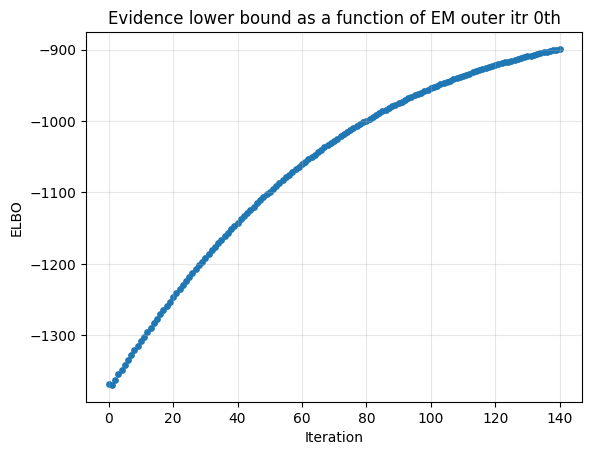

In [46]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

> Generating polygenic scores...
0.0020735254838058145
-0.045535980101517694


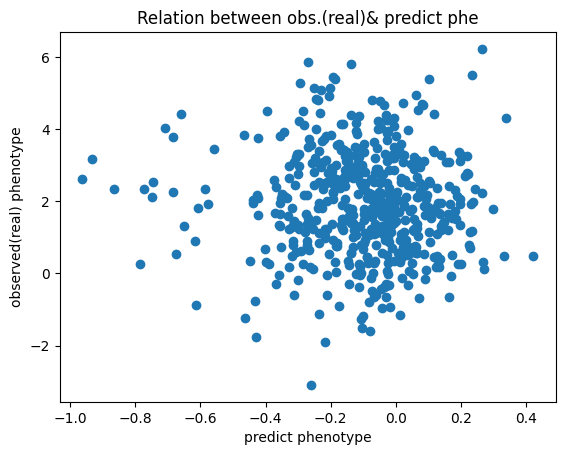

In [47]:
pred = v.predict(realA22Val_gdl)
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
print(corr_train)

plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

<h5>For real phe for chr22 add covariates </h5>
I tested this using the fixed_paras = {'pi':0.99994, 'sigma_epsilon':  0.50}
This obtained from GridSearch on training data with "validation" critation.  
Covariates: <code>baselineDAS, sex, age, 10PCs from the chr22 dosage file</code>

In [4]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    # phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    phenotype_file = "data/phenotype_data/DREAM_pheno_Full.csv",
    covariates_file="data/Dosage_for_PCA/chr22_covNoHeader.csv"
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22NOCM.sumstats", sep="\t", index=False
)

print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


2177
528


In [5]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi':0.99994, 'sigma_epsilon':  0.50}) 
# v = vp.VIPRS(realA22Train_gdl) 
# theta_0 = {'pi': 0.999945, 'sigma_epsilon': 0.50}
# v.initialize(theta_0=theta_0)
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▎        | 137/1000 [01:19<08:21,  1.72it/s]

Converged at iteration 138 | ELBO: -868.234028
> Final ELBO: -868.234028
> Estimated heritability: 0.606434
> Estimated proportion of causal variants: 0.999940


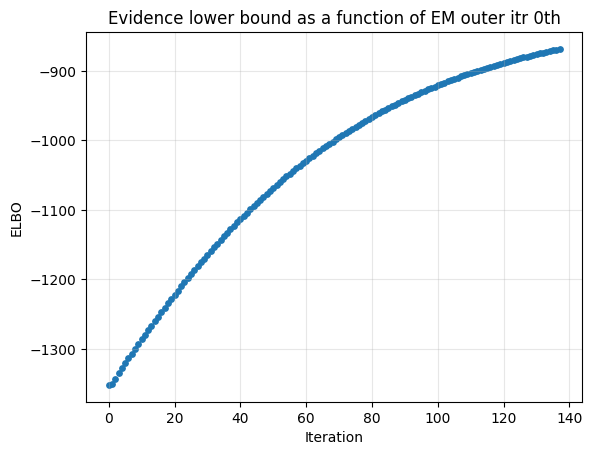

In [6]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

> Generating polygenic scores...
0.005576905873774572
-0.07467868419953963


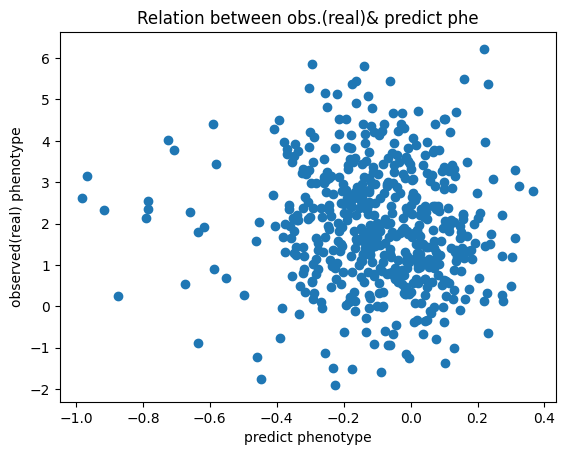

In [7]:
pred = v.predict(realA22Val_gdl)
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
print(corr_train)

plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)